In [2]:
import pandas as pd

In [5]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)
titanic.drop(columns=["Cabin"], inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

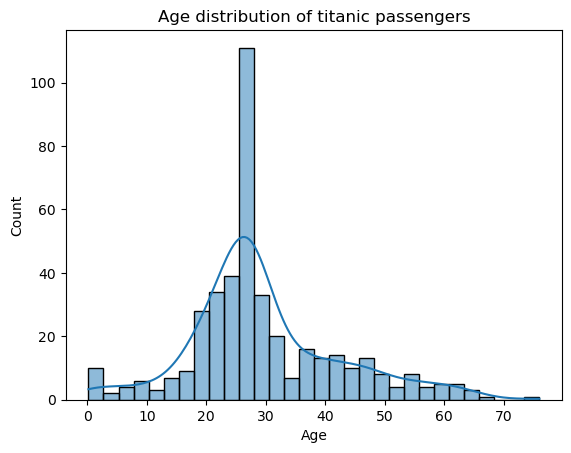

In [21]:
#Univariate Data analysis
sns.histplot(titanic['Age'], bins = 30, kde = True)
plt.title("Age distribution of titanic passengers")
plt.show()

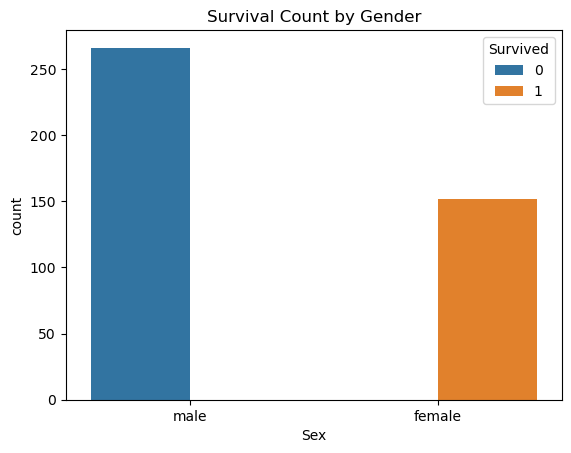

In [23]:
#Bivariate Data Analysis
sns.countplot(data= titanic, x = 'Sex', hue = 'Survived')
plt.title("Survival Count by Gender")
plt.show()

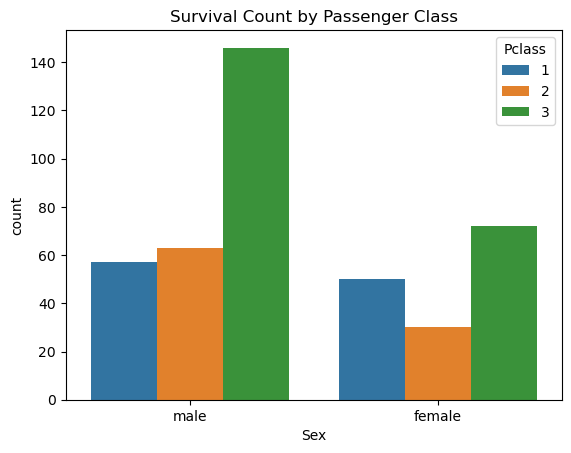

In [25]:
sns.countplot(data = titanic, x = 'Sex' , hue= 'Pclass')
plt.title("Survival Count by Passenger Class")
plt.show()

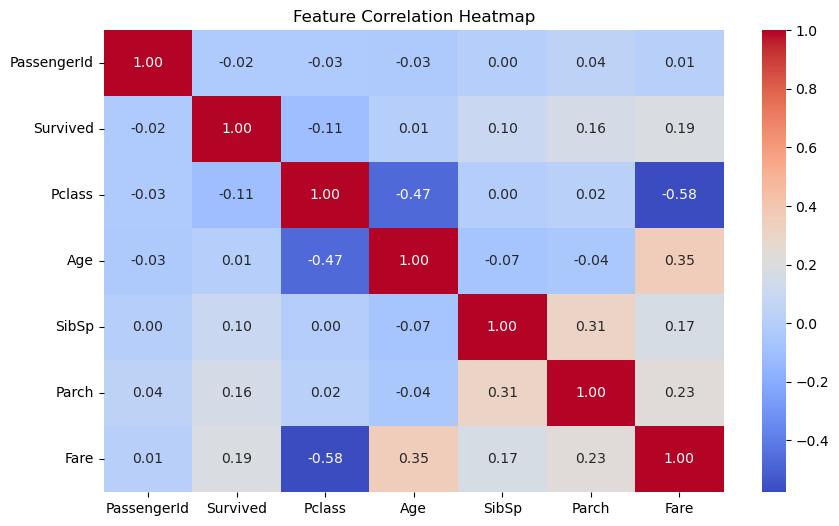

In [30]:
#Correlation Analysis
numeric_titanic = titanic.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
#Create new features
titanic['FamilySize']= titanic["SibSp"] + titanic["Parch"] + 1

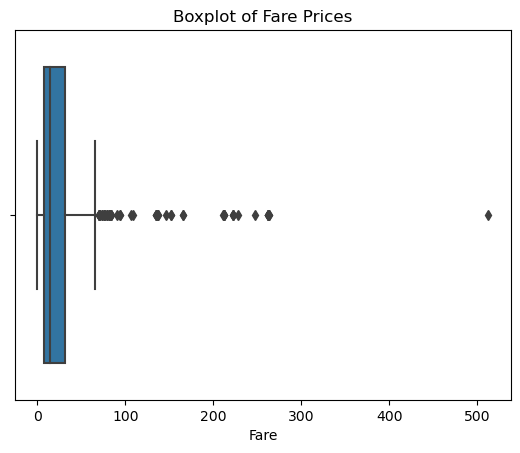

In [33]:
#Detecting outliers
sns.boxplot(x=titanic["Fare"])
plt.title("Boxplot of Fare Prices")
plt.show()

In [36]:
#Handling outliers
from scipy.stats.mstats import winsorize
titanic["Fare_Winsorized"] = winsorize(titanic["Fare"], limits=[0.05, 0.05])

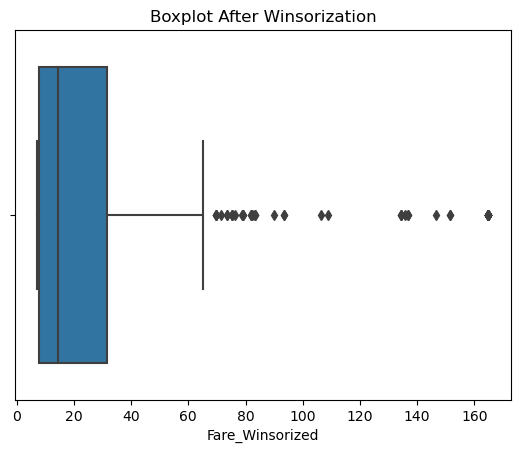

In [37]:
sns.boxplot(x=titanic["Fare_Winsorized"])
plt.title("Boxplot After Winsorization")
plt.show()

In [39]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
#Normalization
titanic[["Fare_Normalized", "Age_Normalized"]] = scaler.fit_transform(titanic[["Fare", "Age"]])
titanic[["Fare", "Fare_Normalized"]].head()


,Fare,Fare_Normalized
0,7.8292,0.015282
1,7.0000,0.013663
2,9.6875,0.018909
3,8.6625,0.016908
4,12.2875,0.023984


In [43]:
titanic[["Age", "Age_Normalized"]].head()

,Age,Age_Normalized
0,34.5,0.452723
1,47.0,0.617566
2,62.0,0.815377
3,27.0,0.353818
4,22.0,0.287881


In [44]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
titanic[["Fare_Standardized", "Age_Standardized"]] = scaler.fit_transform(titanic[["Fare", "Age"]])
titanic[["Fare", "Fare_Standardized"]].head()

,Fare,Fare_Standardized
0,7.8292,-0.497811
1,7.0000,-0.512660
2,9.6875,-0.464532
3,8.6625,-0.482888
4,12.2875,-0.417971


In [46]:
titanic[["Age", "Age_Normalized"]].head()

,Age,Age_Normalized
0,34.5,0.452723
1,47.0,0.617566
2,62.0,0.815377
3,27.0,0.353818
4,22.0,0.287881


In [48]:
import os
os.getcwd()


'C:\\Users\\AKS'